# Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.matrix([
    [4,1],
    [2,2],
    [3,3],
    [1,4],
    [6,5],
    [7,6],
    [5,7],
    [9,8],
    [10,9]
])

In [4]:
y = data[:,0]
y

matrix([[ 4],
        [ 2],
        [ 3],
        [ 1],
        [ 6],
        [ 7],
        [ 5],
        [ 9],
        [10]])

In [5]:
x = data[:,1]
x

matrix([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [6]:
regression_matrix = np.c_[ np.ones(data.shape[0]), x]
regression_matrix

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.],
        [1., 8.],
        [1., 9.]])

### Beta

In [7]:
step_1 = regression_matrix.transpose()
step_1

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [102]:
a = np.array([[1,1,1,1,1,1,1,1,1],[1,2,3,4,5,6,7,8,9]])

b = np.array([[.52778, -.08333],[-.08333, .01667]])

np.dot(b, a)

array([[ 4.4445e-01,  3.6112e-01,  2.7779e-01,  1.9446e-01,  1.1113e-01,
         2.7800e-02, -5.5530e-02, -1.3886e-01, -2.2219e-01],
       [-6.6660e-02, -4.9990e-02, -3.3320e-02, -1.6650e-02,  2.0000e-05,
         1.6690e-02,  3.3360e-02,  5.0030e-02,  6.6700e-02]])

In [8]:
step_2 = np.dot(step_1, regression_matrix)
step_2

matrix([[  9.,  45.],
        [ 45., 285.]])

In [9]:
step_3 = np.linalg.inv(step_2)
step_3

matrix([[ 0.52777778, -0.08333333],
        [-0.08333333,  0.01666667]])

In [10]:
step_4 = np.dot(step_3, step_1)
step_4

matrix([[ 0.44444444,  0.36111111,  0.27777778,  0.19444444,  0.11111111,
          0.02777778, -0.05555556, -0.13888889, -0.22222222],
        [-0.06666667, -0.05      , -0.03333333, -0.01666667,  0.        ,
          0.01666667,  0.03333333,  0.05      ,  0.06666667]])

In [11]:
step_5 = step_4 * y #not a dot product
step_5

matrix([[0.63888889],
        [0.91666667]])

In [12]:
beta = np.linalg.inv(regression_matrix.transpose() * regression_matrix) * regression_matrix.transpose() * y
beta

matrix([[0.63888889],
        [0.91666667]])

### Result

In [13]:
regression_result = regression_matrix * beta
regression_result

matrix([[1.55555556],
        [2.47222222],
        [3.38888889],
        [4.30555556],
        [5.22222222],
        [6.13888889],
        [7.05555556],
        [7.97222222],
        [8.88888889]])

### Plot

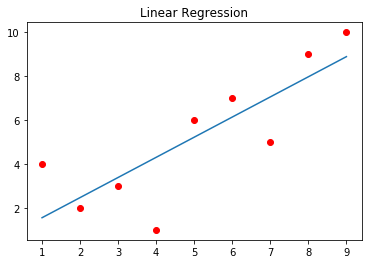

In [14]:
plt.plot(x,y,'ro')
plt.plot(x,regression_result)
plt.title("Linear Regression")
plt.show()

## Wrap it all up

In [15]:
class LinearRegression:
    
    
    def __init__(self):
        pass
        
        
    def fit(self, x, y):
        regression_matrix = np.c_[np.ones(len(y)), x]
        beta = np.linalg.inv(regression_matrix.transpose() * regression_matrix)\
            * regression_matrix.transpose() * y
        result = regression_matrix * beta
        return result
    

In [16]:
linreg = LinearRegression()

linreg.fit(x, y)

matrix([[1.55555556],
        [2.47222222],
        [3.38888889],
        [4.30555556],
        [5.22222222],
        [6.13888889],
        [7.05555556],
        [7.97222222],
        [8.88888889]])

## Mean Squared Error

In [17]:
np.mean(np.square(np.absolute(linreg.fit(x, y) - y)))

2.7932098765432096

## From Scratch

In [18]:
data = [[4,1],[2,2],[3,3],[1,4],[6,5],[7,6],[5,7],[9,8],[10,9]]
x = [i[1] for i in data]
y = [i[0] for i in data]

x, y

([1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 2, 3, 1, 6, 7, 5, 9, 10])

In [19]:
reg_matrix = [[(i * 0) + 1, i] for i in x]
reg_matrix

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9]]

In [20]:
transposed_reg_matrix = [[i[0] for i in reg_matrix], [i[1] for i in reg_matrix]]
transposed_reg_matrix

[[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [21]:
def dot_product(matrix_a, matrix_b):    
    dot_product = []
    for i in range(len(matrix_b[0])):
        prod_row = []
        for j in range(len(matrix_a)):
            row = matrix_a[i]
            column = [x[j] for x in matrix_b]
            prod_row.append(sum([m * n for m, n in zip(row, column)]))
        dot_product.append(prod_row)

    return dot_product  

In [22]:
dot_product(transposed_reg_matrix, reg_matrix)

[[9, 45], [45, 285]]

In [23]:
def inverse(two_x_two_matrix):
    fraction = 1 / ((two_x_two_matrix[0][0] * two_x_two_matrix[1][1])\
               - (two_x_two_matrix[0][1] * two_x_two_matrix[1][0]))
    
    # rearrange_matrix
    initial_00 = two_x_two_matrix[0][0]
    initial_11 = two_x_two_matrix[1][1]
    two_x_two_matrix[0][0] = initial_11 * fraction
    two_x_two_matrix[0][1] = (two_x_two_matrix[0][1] * -1) * fraction
    two_x_two_matrix[1][0] = (two_x_two_matrix[1][0] * -1) * fraction
    two_x_two_matrix[1][1] = initial_00 * fraction
    
    return two_x_two_matrix  

In [24]:
inverse(dot_product(transposed_reg_matrix, reg_matrix))

[[0.5277777777777778, -0.08333333333333334],
 [-0.08333333333333334, 0.016666666666666666]]

In [25]:
a = inverse(dot_product(transposed_reg_matrix, reg_matrix))
b = transposed_reg_matrix

b

[[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [104]:
matrix_a = inverse(dot_product(transposed_reg_matrix, reg_matrix))
matrix_b = transposed_reg_matrix
result = []

for i in [[a, b] for a, b in zip(matrix_b[0], matrix_b[1])]:
    row = []
    for j in matrix_a:
        print(i, j)
        product = i[0] * i[1] * j[0] * j[1]
        print(product)
        row.append(product)
    result.append(row)

[1, 1] [0.5277777777777778, -0.08333333333333334]
-0.04398148148148149
[1, 1] [-0.08333333333333334, 0.016666666666666666]
-0.001388888888888889
[1, 2] [0.5277777777777778, -0.08333333333333334]
-0.08796296296296298
[1, 2] [-0.08333333333333334, 0.016666666666666666]
-0.002777777777777778
[1, 3] [0.5277777777777778, -0.08333333333333334]
-0.13194444444444448
[1, 3] [-0.08333333333333334, 0.016666666666666666]
-0.004166666666666667
[1, 4] [0.5277777777777778, -0.08333333333333334]
-0.17592592592592596
[1, 4] [-0.08333333333333334, 0.016666666666666666]
-0.005555555555555556
[1, 5] [0.5277777777777778, -0.08333333333333334]
-0.21990740740740744
[1, 5] [-0.08333333333333334, 0.016666666666666666]
-0.006944444444444446
[1, 6] [0.5277777777777778, -0.08333333333333334]
-0.26388888888888895
[1, 6] [-0.08333333333333334, 0.016666666666666666]
-0.008333333333333333
[1, 7] [0.5277777777777778, -0.08333333333333334]
-0.3078703703703704
[1, 7] [-0.08333333333333334, 0.016666666666666666]
-0.00972

In [105]:
result

[[-0.04398148148148149, -0.001388888888888889],
 [-0.08796296296296298, -0.002777777777777778],
 [-0.13194444444444448, -0.004166666666666667],
 [-0.17592592592592596, -0.005555555555555556],
 [-0.21990740740740744, -0.006944444444444446],
 [-0.26388888888888895, -0.008333333333333333],
 [-0.3078703703703704, -0.009722222222222222],
 [-0.3518518518518519, -0.011111111111111112],
 [-0.39583333333333337, -0.012500000000000002]]

In [107]:
dot_product(matrix_b, matrix_a)

[[0.4444444444444444, -0.06666666666666668],
 [0.3611111111111111, -0.05000000000000001]]

In [108]:
cmd = input()

 12


In [110]:
cmd.split( )[0]

'12'